# Support Vector Machine (SVM)



Invented in [1963](https://en.wikipedia.org/wiki/Support_vector_machine#History) by [Vladimir N. Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.




### Learning Outcomes:

* Introduction
* Linear SVM Classification
* Polynomial Kernal
* Radial Basis Function /  Gaussian Kernel
* Support Vector Regression

***

# 1. Introduction



Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes. 

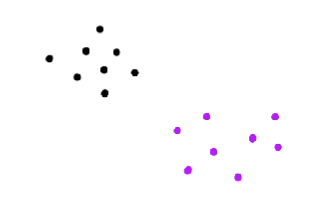

We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.

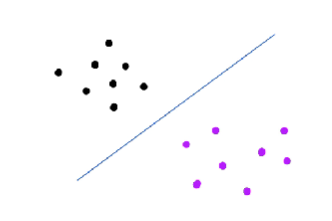

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates. 

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. 


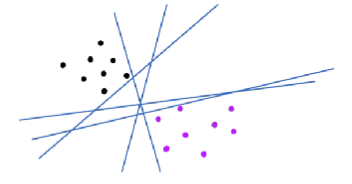

In SVM, the **separating line**, the solid brown line, is the line that allows for largest margin between the two classes. 

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called **support vectors**, circled in red.

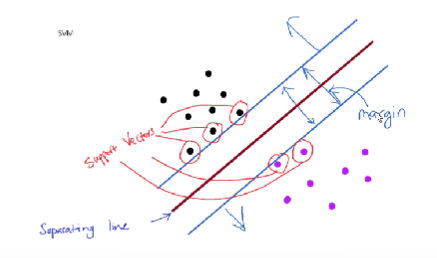



***


# 2. Linear SVM Classification


* Support Vectors

* Separate with a straight line (linearly separable)

* Margin

  * Hard margin classification
      * Strictly based on those that are at the margin between the two classes
      * However, this is sensitive to outliers
      
  * Soft margin classification
      * Widen the margin and allows for violation
      * With Python Scikit-Learn, you control the width of the margin
      * Control with `C` hyperparameter
        * smaller `C` leads to a wider street but more margin violations
        * High `C` - fewer margin violations but ends up with a smaller margin



**Note:**

* SVM are sensitive to feature scaling


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ["petal_length", "petal_width", "species"]
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [70]:
col = ["petal_length", "petal_width"]
X = df.loc[:,col]

In [15]:
species_to_num = {"setosa":0,
                  "versicolor": 1,
                  "virginica": 2}    # encoding of categorical data into numerical

In [16]:
df["tmp"] = df["species"].map(species_to_num)
y = df["tmp"]

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [71]:
C = 0.11
clf = svm.SVC(kernel="linear", C=C)
# clf = svm.LinearSVC(C=C, loss="hinge")
# clf = svm.SVC(kernel="poly", degree=3, C=C)
# clf = svm.SVC(kernel="rbf", gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.11, kernel='linear')

In [72]:
clf.predict([[6,2]])

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [73]:
Xv = X.values.reshape(-1,1)
h=0.02             # hyperparameter
X_min, X_max = Xv.min(), Xv.max()+1
y_min, y_max = y.min(), y.max()+1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(y_min, y_max))

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


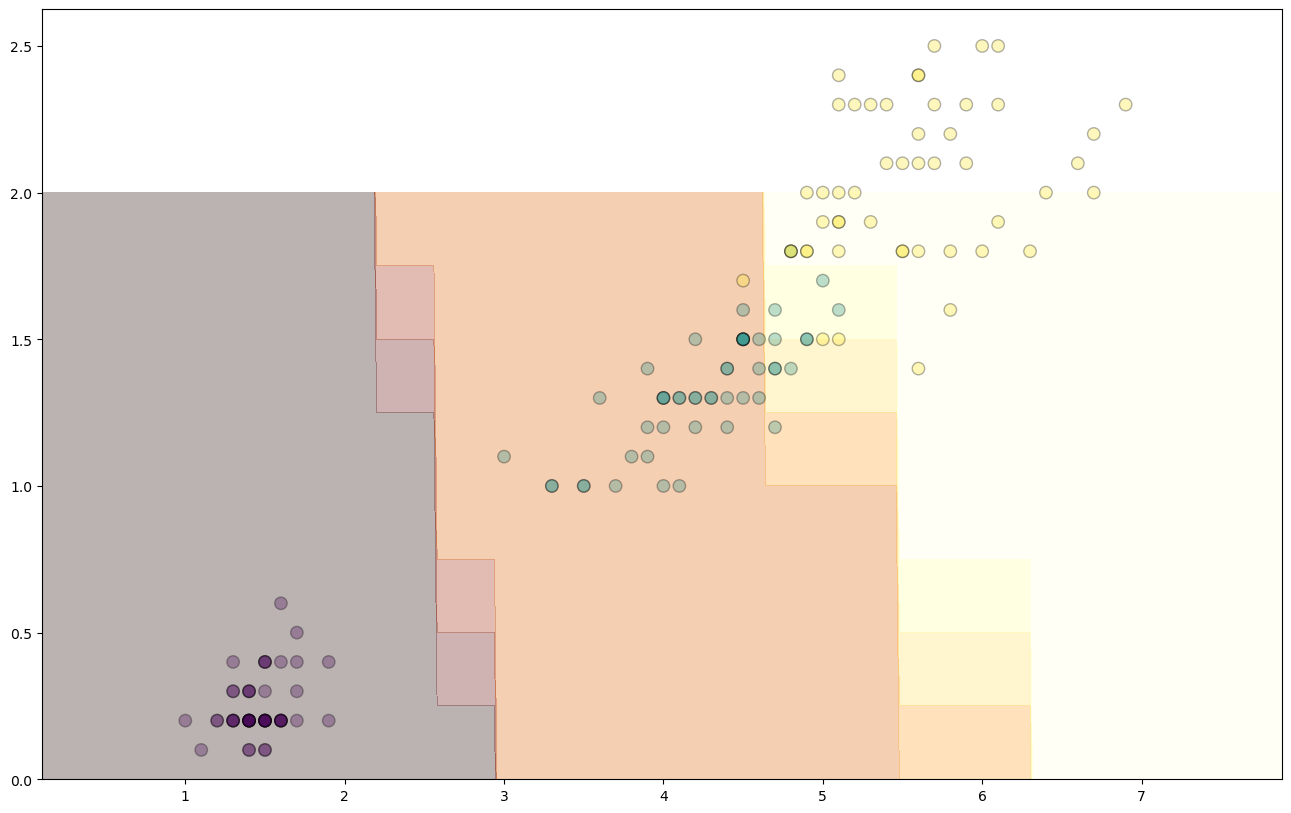

In [74]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap="afmhot", alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha=0.3, edgecolors="black");

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


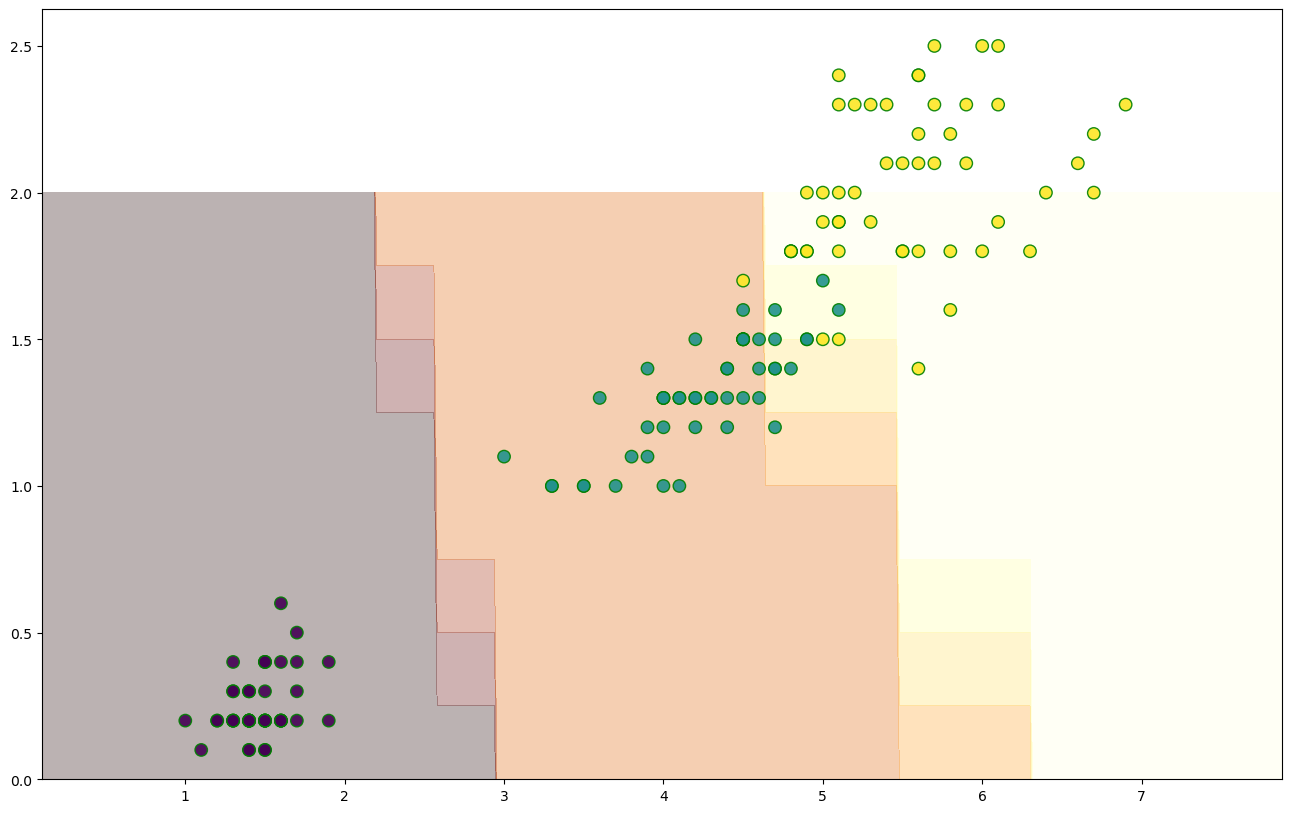

In [75]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

## Linear SVM Implementation

In [76]:
df = sns.load_dataset("iris")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col = ["petal_length", "petal_width"]
X = df.loc[:, col]
species_to_num = {"setosa": 0,
                  "versicolor":1,
                  "virginica":2}
df["tmp"] = df["species"].map(species_to_num)
y = df["tmp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

### Scale Features

In [77]:
sc_X = StandardScaler()
X_std_train = sc_X.fit_transform(X_train)

In [78]:
C = 1.0
clf = svm.SVC(kernel="linear", C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 

### Cross Validation with Train Dataset

In [80]:
result = cross_val_score(clf, X_std_train, y_train, cv=10, scoring="accuracy")
print("Average Accuracy: \t {0:.4f}".format(np.mean(result)))
print("Average SD: \t\t {0:.4f}".format(np.std(result)))

Average Accuracy: 	 0.9560
Average SD: 		 0.0577


In [81]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [82]:
confusion_matrix(y_train, y_train_pred)

array([[47,  0,  0],
       [ 0, 40,  2],
       [ 0,  3, 43]], dtype=int64)

In [83]:
print("Precision Score:\t {0:.4f}".format(precision_score(y_train, 
                                                          y_train_pred, 
                                                          average="weighted")))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train, 
                                                       y_train_pred,
                                                       average="weighted")))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                               y_train_pred,
                                               average="weighted")))

Precision Score:	 0.9632
Recall Score: 		 0.9630
F1 Score: 		 0.9630


### Cross Validationn with Test Dataset

In [84]:
y_test_pred = cross_val_predict(clf, 
                                sc_X.transform(X_test),
                                y_test,
                                cv=3)

In [85]:
confusion_matrix(y_test, y_test_pred)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 1, 3]], dtype=int64)

In [86]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,
                                                           y_test_pred,
                                                           average="weighted")))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred,
                                                       average="weighted")))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred,
                                               average="weighted")))

Precision Score: 	 0.9407
Recall Score: 		 0.9333
F1 Score: 		 0.9305


***

# 3. Polynomial Kernel

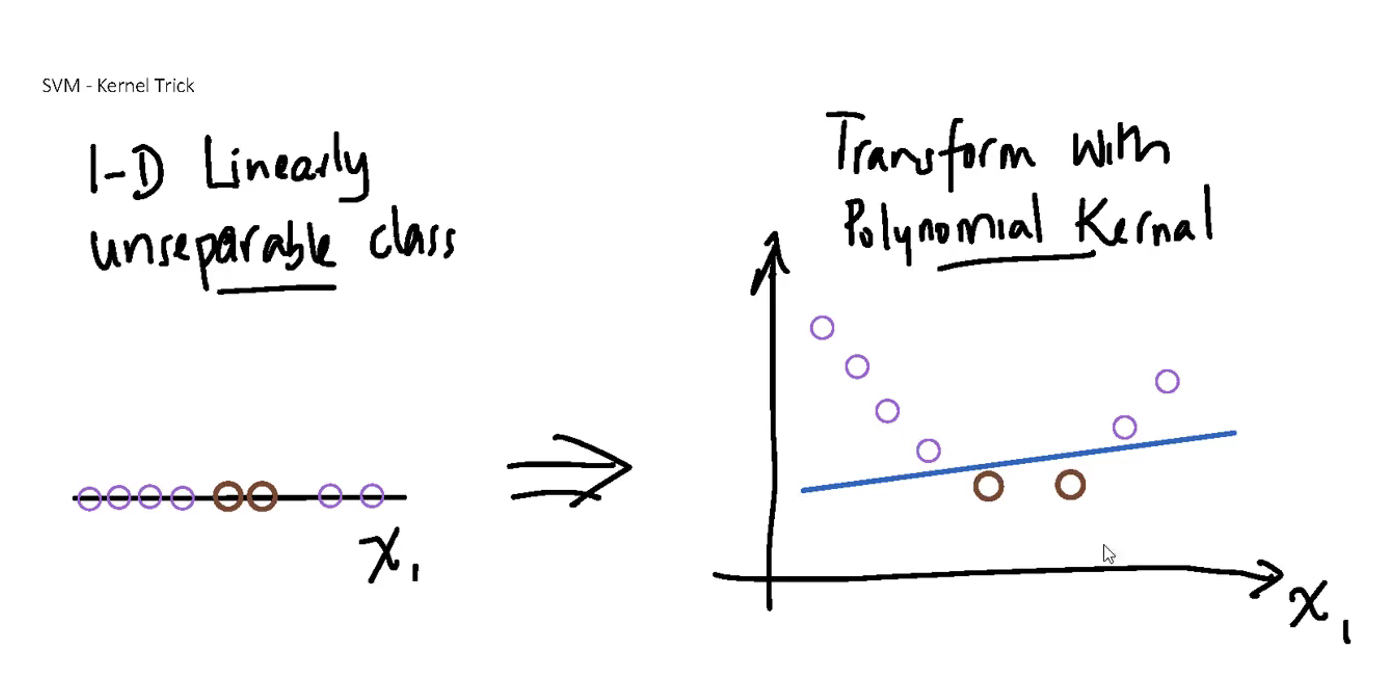

In [87]:
c = 1.0
clf = svm.SVC(kernel="poly", degree=3, C=C)
clf.fit(X, y)

SVC(kernel='poly')

In [90]:
Xv = X.values.reshape(-1,1)
h = 0.02
X_min, X_max = Xv.min(), Xv.max()+1
y_min, y_max = y.min(), y.max()+1
XX, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(y_min, y_max, h)) 

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


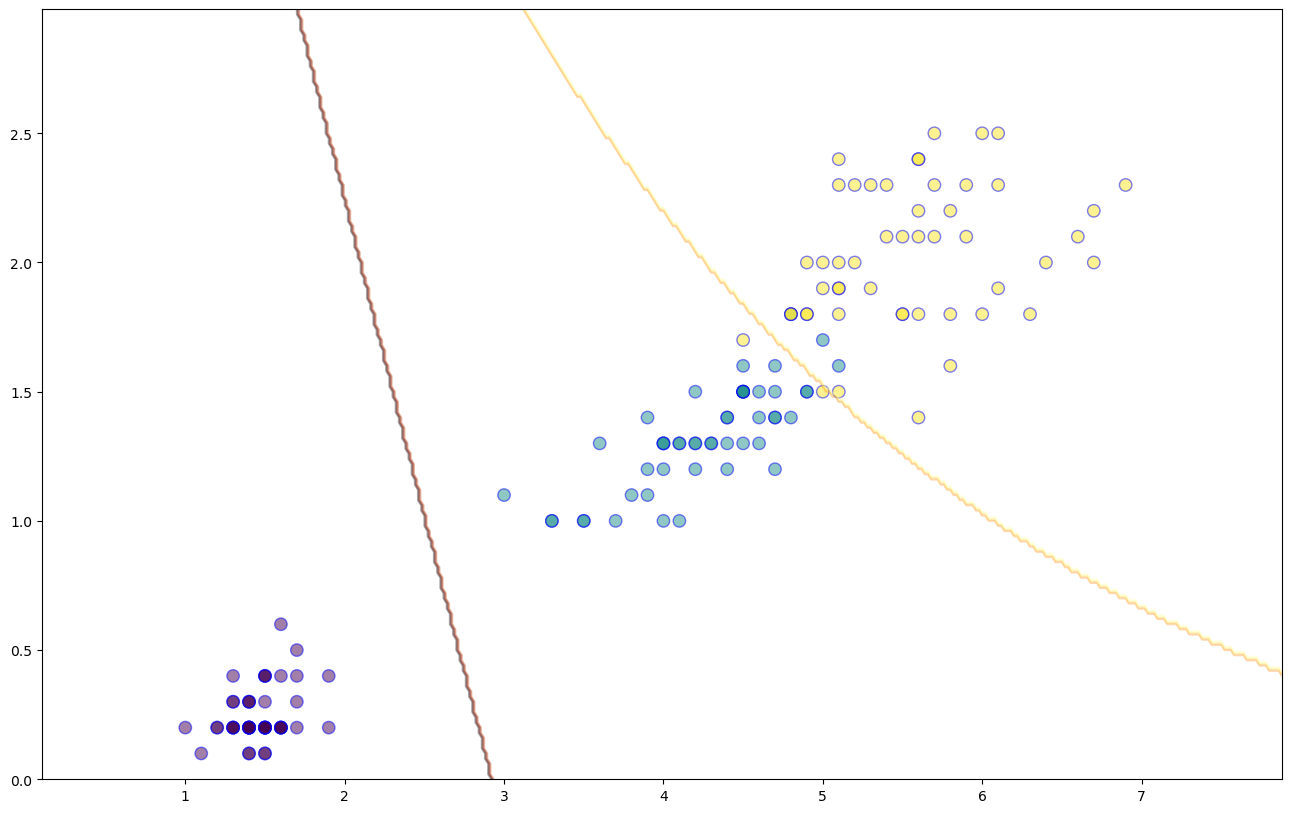

In [95]:
z = clf.predict(np.c_[XX.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contour(XX, yy, z, cmap="afmhot", alpha=0.3);
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha=0.5, edgecolors="b");

## Polynomial SVM Implementation

In [96]:
df = sns.load_dataset("iris")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col = ["petal_length", "petal_width"]
X = df.loc[:,col]
species_to_num = {"setosa":0,
                  "versicolor":1,
                  "virginica": 2}
df["tmp"] = df["species"].map(species_to_num)
y = df["tmp"]
X_train, X_std_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                        random_state=0)

### Scale Features

In [97]:
sc_X = StandardScaler()
X_std_train = sc_X.fit_transform(X_train)

In [98]:
C = 1.0
clf = svm.SVC(kernel="poly", degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='poly')

### Cross Validation within Train Dataset

In [102]:
result = cross_val_score(clf, X_std_train, y_train, cv=10, scoring="accuracy")
print("Average Accuracy:\t {0:.4f}".format(np.mean(result)))
print("Accuracy SD: \t\t {0:.4f}".format(np.mean(result)))

Average Accuracy:	 0.9500
Accuracy SD: 		 0.9500


In [100]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [101]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [103]:
print("Precision Score\t {0:.4f}".format(precision_score(y_train,
                                                         y_train_pred, 
                                                         average="weighted")))
print("Recall Score\t {0:.4f}".format(recall_score(y_train,
                                                         y_train_pred, 
                                                         average="weighted")))
print("F1 Score\t {0:.4f}".format(f1_score(y_train,
                                                         y_train_pred, 
                                                         average="weighted")))

Precision Score	 0.9570
Recall Score	 0.9500
F1 Score	 0.9500


### Cross Validation within Test Dataset

In [104]:
y_test_pred = cross_val_predict(clf, X_std_test, y_test, cv=3)

In [105]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [106]:
print("Precision Score\t {0:.4f}".format(precision_score(y_test,
                                                         y_test_pred, 
                                                         average="weighted")))
print("Recall Score\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average="weighted")))
print("F1 Score\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average="weighted")))

Precision Score	 0.9422
Recall Score	 0.9333
F1 Score	 0.9290


***

# 4. Gaussian Radial Basis Function (rbf)

<h2>Linear kernel<br><br>
    
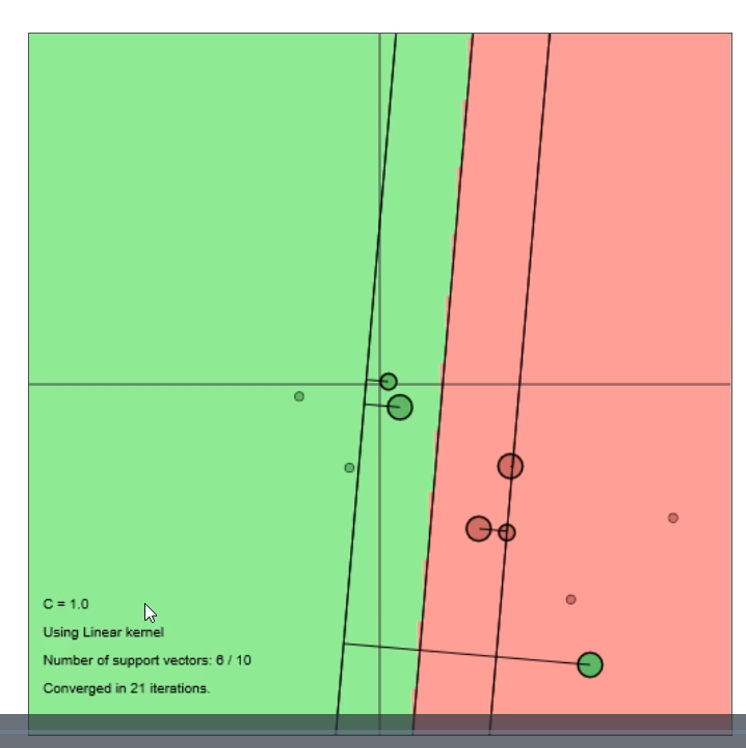
<h2>RBF kernel (non-linear)<br><br>

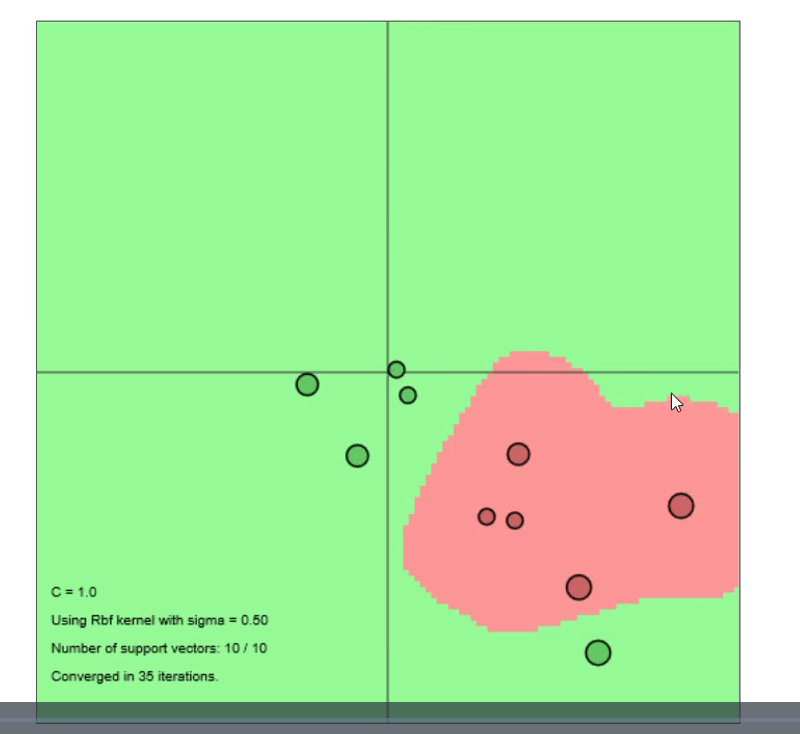

The kernel function can be any of the following:

* linear: $\langle x, x'\rangle$.


* polynomial: $(\gamma \langle x, x'\rangle + r)^d$. 

  $d$ is specified by keyword `degree`
  
  $r$ by `coef0`.


* rbf: $\exp(-\gamma \|x-x'\|^2)$. 

  $\gamma$ is specified by keyword `gamma` must be greater than 0.


* sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$

  where $r$ is specified by `coef0`.
  
[scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

In [171]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

### Scale Features

In [172]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [173]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(gamma=0.7)

### Cross Validation within Train Dataset

In [174]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [175]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [176]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [177]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


### Grid Search

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters

In [178]:
from sklearn.pipeline import Pipeline

In [179]:
from sklearn.model_selection import train_test_split, GridSearchCV

we can improve this by scaling the features

In [180]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [181]:
params = {"clf__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "clf__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [144]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3,
                            verbose=1, scoring="accuracy")

In [145]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [146]:
svm_grid_rbf.best_score_

0.9583333333333334

In [147]:
best = svm_grid_rbf.best_estimator_.get_params()

In [148]:
for k in sorted(params.keys()):
    print("\t {0}:\t {1:.2f}".format(k, best[k]))

	 clf__C:	 0.50
	 clf__gamma:	 0.50


conducting validation in test set

In [182]:
y_test_pred = svm_grid_rbf.predict(X_std_test)

In [183]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [184]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


***

# 5. Support Vector Regression

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
df = pd.read_csv("../2_Boston_housing_project/housing.data", 
                 delim_whitespace=True, header=None)
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = cols

In [198]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [201]:
y = df.MEDV
X = df[['LSTAT']].values

In [202]:
svr = SVR()
svr.fit(X, y)

SVR()

In [203]:
sort_idx = X.flatten().argsort()

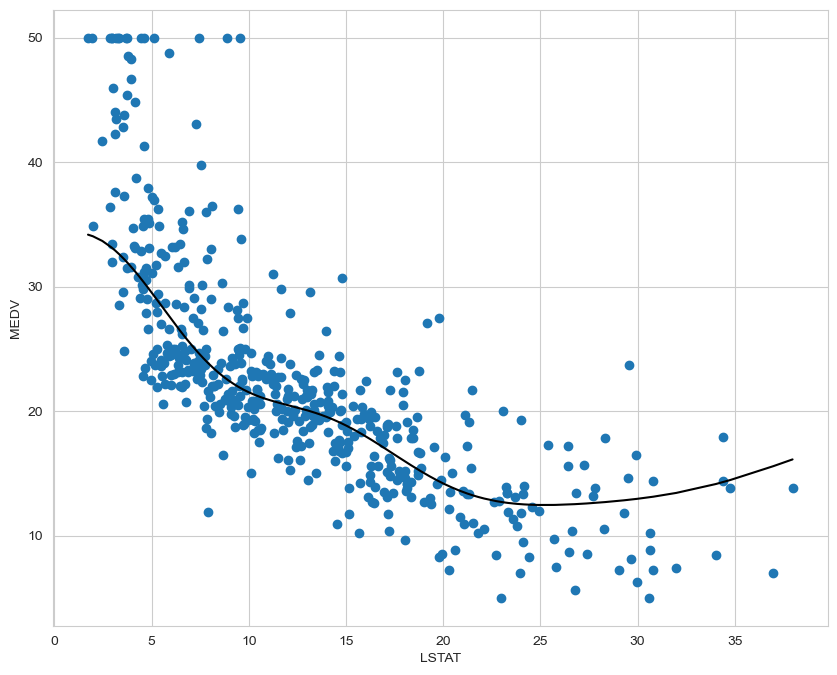

In [204]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

### Linear Kernel

In [206]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [207]:
y_train_pred = svr.predict(X_train)

In [208]:
y_test_pred = svr.predict(X_test)

In [209]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test: 36.8372


In [210]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test: 0.5056


### Polynomial

In [211]:
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

SVR(C=1000.0, degree=2, kernel='poly')

In [212]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [213]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 58.7201, test: 48.1976
R^2 train: 0.3319, test: 0.3532


### rbf Kernel

In [214]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [215]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [216]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


***

# 6. Advantages and Disadvantages



The **advantages** of support vector machines are:
* Effective in high dimensional spaces.
* Uses only a subset of training points (support vectors) in the decision function.
* Many different Kernel functions can be specified for the decision function.
    * Linear
    * Polynomial
    * RBF
    * Sigmoid
    * Custom


The **disadvantages** of support vector machines include:
* Beware of overfitting when num_features > num_samples.
* Choice of Kernal and Regularization can have a large impact on performance
* No probability estimates


***

# 7. Summary

| Class           |  Out-of-core support | Kernel Trick |
| :-              |  :-                  | :-           | 
| `SGDClassifier` |                  Yes | No           |
| `LinearSVC`     |  No                  | No           |
| `SVC`           |  No                  | Yes          |

**Note:** All require features scaling

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization. 

***